In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install xgboost
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

!pip install optuna
import optuna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

plt.style.use('seaborn-v0_8-deep')

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Scatter Plot**

In [5]:
def PlotScatter(x, y, title, xunit, yunit, format_x, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    if (format_x == 1):
        plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlot(df_x, df_y, title, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()
    plt.close()

In [8]:
def PlotBoxPlotV2(df_x, df_y, title, yunit, size_x, size_y):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel("", fontsize = 1)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.gcf().set_size_inches(size_x, size_y)

    plt.show()
    plt.close()

## **Regression Plot**

In [10]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

In [11]:
def PlotRegPlot2(df_x, df_y, title):
    plt.figure(figsize=(6, 5))
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})
    
    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_ylabel("US$", fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)
    plt.gca().set_xlabel("", fontsize = 10)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

    plt.xlim(0,)
    plt.ylim(0,)

    plt.show()
    plt.close()

## **Histogram**

In [13]:
def HistPlot(x, title, xunit, x_size):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.histplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(0.98, -0.08)

    plt.ylabel("Count")

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    plt.show()
    plt.close()

## **Predicted vs Actual Values**

In [15]:
def PlotFitted(y_test, yhat, title):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")
    
    plt.title(title)

    y_test1 = np.exp(y_test)
    yhat1 = np.exp(yhat)

    sns.scatterplot(x=y_test1.to_numpy().flatten(), y=yhat1, alpha=0.6)
    plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.gcf().set_size_inches(7, 5)

    plt.ylim(0,)
    plt.xlim(0,)
    
    plt.show()
    plt.close()
    
    
    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

In [16]:
def PlotFittedV(yhat, y_test, model, x_data, y_data, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(y_test, hist=False, color="r", label = "Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))
    print("- Cross-Validation Score:", cross_val_score(model, x_data, y_data, cv=5).mean())

In [17]:
def PlotFittedV2(yhat, y_test, title, xlabel):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)

    ax2 = sns.distplot(np.exp(y_test), hist=False, color="r", label = "Actual Value")
    sns.distplot(np.exp(yhat), hist=False, color="b", label="Predicted Value", ax = ax2)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.ylabel("Density")
    plt.xlabel(xlabel)
    plt.legend(['Actual Value', 'Predicted Value'], framealpha=0)

    plt.gcf().set_size_inches(7, 5)

    plt.show()
    plt.close()

    print("\n- Mean Squared Error:", mean_squared_error(y_test, yhat))
    print("- Root Mean Squared Error:", root_mean_squared_error(y_test, yhat))

## **Line Plot**

In [19]:
def PlotLine(y, title, yunit, x_size, y_size):
  plt.figure().patch.set_facecolor("0.85")
  plt.axes().set(facecolor = "0.85")

  plt.title(title)
  plt.plot(y)

  plt.grid(False)
  plt.gca().spines['bottom'].set_visible(True)
  plt.gca().spines['left'].set_visible(True)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_color("black")
  plt.gca().spines['left'].set_color("black")

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

## **K-Fold Target Encoding**

In [21]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [23]:
y_data = pd.read_csv('../data/processed/2.1.EDA_ydata_train.csv')

x_data_lgbm = pd.read_csv("../data/processed/2.1.EDA_lgbm_train.csv")
x_train_lgbm, x_test_lgbm, y_train, y_test = train_test_split(x_data_lgbm, y_data, test_size=0.30, random_state=13)

x_data_xgbr = pd.read_csv("../data/processed/2.1.EDA_xgbr_train.csv")
x_train_xgbr, x_test_xgbr, _, _ = train_test_split(x_data_xgbr, y_data, test_size=0.30, random_state=13)

x_data_cbr = pd.read_csv("../data/processed/2.1.EDA_cbr_train.csv")
x_train_cbr, x_test_cbr, _, _ = train_test_split(x_data_cbr, y_data, test_size=0.30, random_state=13)

x_data_gbr = pd.read_csv("../data/processed/2.1.EDA_gbr_train.csv")
x_train_gbr, x_test_gbr, _, _ = train_test_split(x_data_gbr, y_data, test_size=0.30, random_state=13)


HousePricesDF_test_lgbm = pd.read_csv("../data/processed/2.2.EDA_lgbm_test.csv")
HousePricesDF_test_xgbr = pd.read_csv("../data/processed/2.2.EDA_xgbr_test.csv")
HousePricesDF_test_cbr = pd.read_csv("../data/processed/2.2.EDA_cbr_test.csv")
HousePricesDF_test_gbr = pd.read_csv("../data/processed/2.2.EDA_gbr_test.csv")

# **MODEL DEVELOPMENT AND EVALUATION**

## **LIGHTGBM**

### **MODEL DEVELOPMENT**

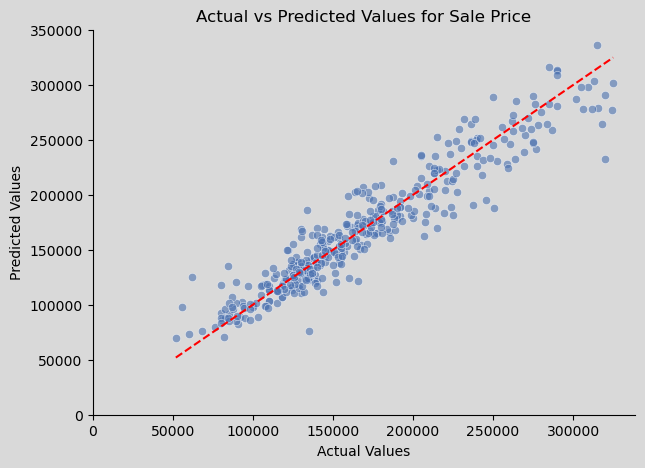


- Mean Squared Error: 0.01383277391644469
- Root Mean Squared Error: 0.11761281357252147


In [45]:
lgbm = LGBMRegressor(verbose = 0)
lgbm.fit(x_train_lgbm, y_train)

yhat_lgbm = lgbm.predict(x_test_lgbm)


PlotFitted(y_test, yhat_lgbm, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 5000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 16),  # Aumentamos o limite superior
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),  # Antes era até 150
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),  
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),  # Reduzimos o máximo de 30 para 20
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.0001, 0.05),  # Antes era até 0.1
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10)
    }

    model = LGBMRegressor(**params, verbose=-1)
    model.fit(x_train_lgbm, y_train)
    y_pred = model.predict(x_test_lgbm)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

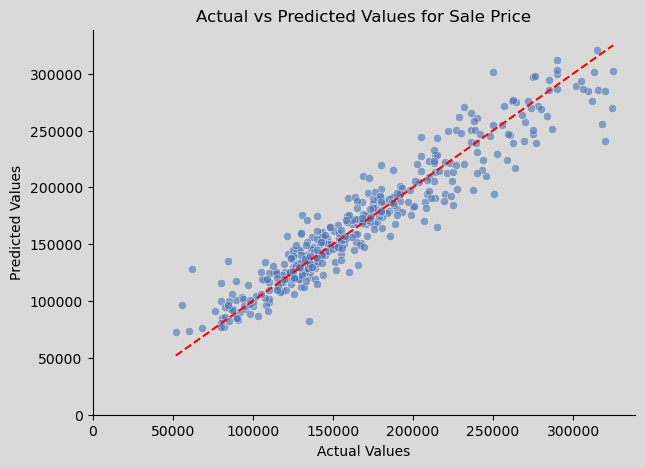


- Mean Squared Error: 0.012833814895482428
- Root Mean Squared Error: 0.11328642855824535


In [47]:
lgbm_op = LGBMRegressor(
    n_estimators = 3279,
    learning_rate = 0.019513469327009314,
    max_depth = 6,
    num_leaves = 46,
    colsample_bytree = 0.7307275298197285,
    subsample = 0.8992312961233889,
    min_child_samples = 20,
    min_gain_to_split = 0.0032330193011227007,
    reg_alpha = 0.17498499089006953,
    reg_lambda = 8.62013728192223,
    verbose = -1
)
lgbm_op.fit(x_train_lgbm, y_train)

yhat_lgbm_op = lgbm_op.predict(x_test_lgbm)

PlotFitted(y_test, yhat_lgbm_op, "Actual vs Predicted Values for Sale Price")

## **XGBOOST REGRESSOR**

### **MODEL DEVELOPMENT**

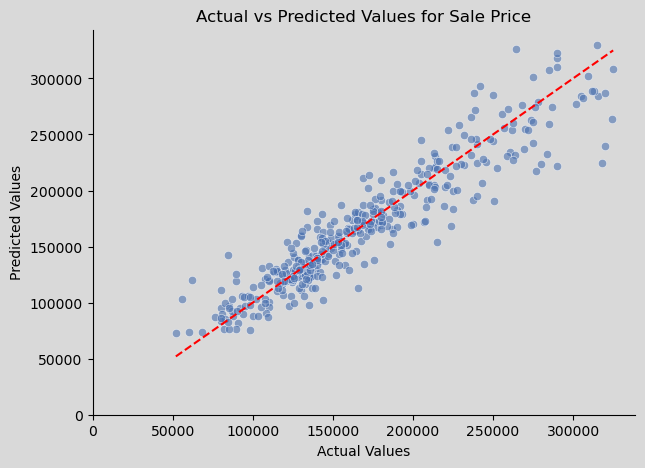


- Mean Squared Error: 0.015976534781699584
- Root Mean Squared Error: 0.12639831795439205


In [49]:
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train_xgbr, y_train)

yhat_xgbr = xgbr.predict(x_test_xgbr)

PlotFitted(y_test, yhat_xgbr, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [ ]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(x_train_xgbr, y_train)
    y_pred = model.predict(x_test_xgbr)
    return root_mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

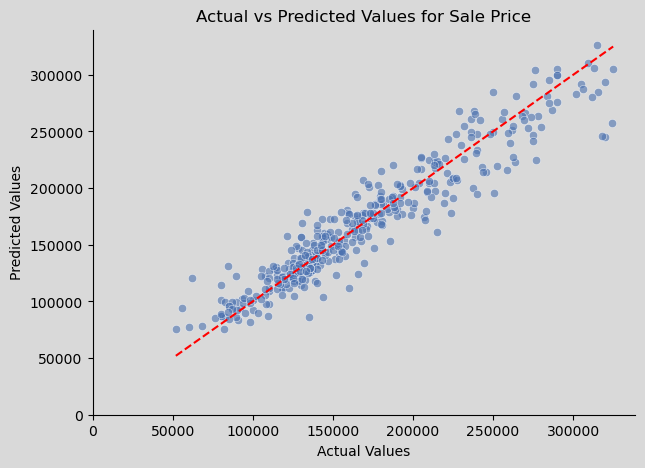


- Mean Squared Error: 0.013331947907527831
- Root Mean Squared Error: 0.1154640546123677


In [51]:
xgb_op = xgb.XGBRegressor(
    max_depth = 6,
    learning_rate = 0.017510101904327613,
    n_estimators = 945,
    min_child_weight = 5,
    gamma = 0.012707394868040532,
    subsample = 0.7549033599840956,
    colsample_bytree = 0.6317163286229157,
    reg_alpha = 0.08183624738612764,
    reg_lambda = 0.5020112298364652
)

xgb_op.fit(x_train_xgbr, y_train)
yhat_xgbr_op = xgb_op.predict(x_test_xgbr)

PlotFitted(y_test, yhat_xgbr_op, "Actual vs Predicted Values for Sale Price")

## **CATBOSST REGRESSOR**

### **MODEL DEVELOPMENT**

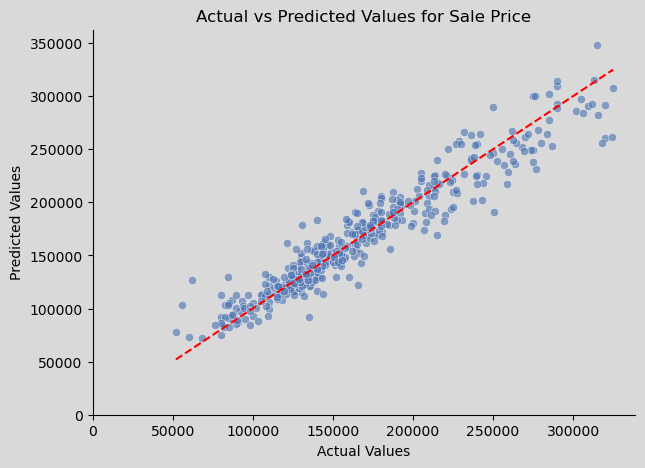


- Mean Squared Error: 0.012230900495478309
- Root Mean Squared Error: 0.110593401681467


In [55]:
cbr = CatBoostRegressor(verbose=0)
cbr.fit(x_train_cbr, y_train)

yhat_cbr = cbr.predict(x_test_cbr)

PlotFitted(y_test, yhat_cbr, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),  # Limitamos para acelerar
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),  # Controla complexidade das árvores
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),  # Regularização
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0)
    }

    model = CatBoostRegressor(**params, verbose=0)
    model.fit(x_train_cbr, y_train)
    y_pred = model.predict(x_test_cbr)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print('\n\nBest trial:', study.best_trial.params)

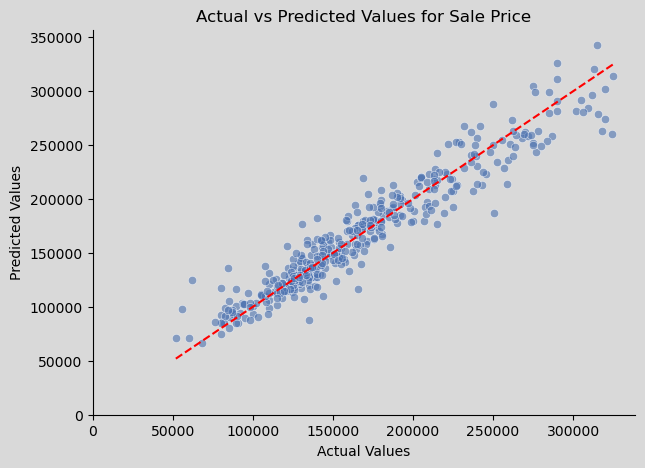


- Mean Squared Error: 0.011887520285989803
- Root Mean Squared Error: 0.10902990546629765


In [57]:
cbr_op = CatBoostRegressor(
    verbose=0,
    iterations = 1847,
    learning_rate = 0.03749971039840202,
    depth = 4,
    l2_leaf_reg = 7.023806589771694,
    random_strength = 2.4037891633296335,
    bagging_temperature = 0.7867815226881087,
    border_count = 247,
    subsample = 0.7485451341946725
)
cbr_op.fit(x_train_cbr, y_train)

yhat_cbr_op = cbr_op.predict(x_test_cbr)

PlotFitted(y_test, yhat_cbr_op, "Actual vs Predicted Values for Sale Price")

## **GRADIENTBOOSTING REGRESSOR**

### **MODEL DEVELOPMENT**

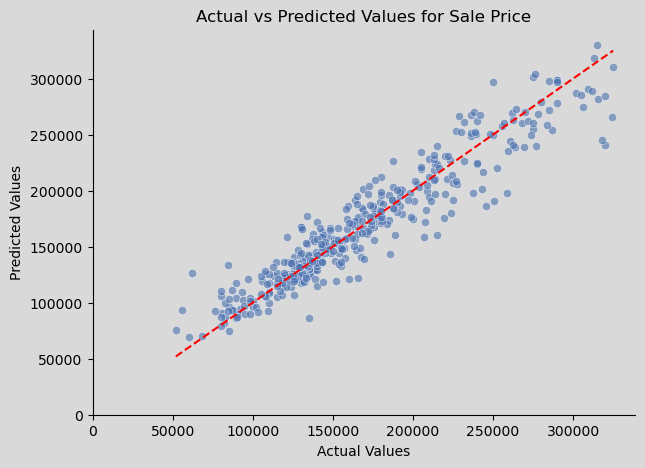


- Mean Squared Error: 0.014033727087547016
- Root Mean Squared Error: 0.11846403288571183


In [59]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_gbr, y_train)

yhat_gbr = gbr.predict(x_test_gbr)

PlotFitted(y_test, yhat_gbr, "Actual vs Predicted Values for Sale Price")

### **MODEL REFINEMENT**

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }

    model = GradientBoostingRegressor(**params)
    scores = cross_val_score(model, x_train_gbr, y_train, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)  
    return -np.mean(scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500, n_jobs=-1)

print('\n\nBest trial:', study.best_trial.params)

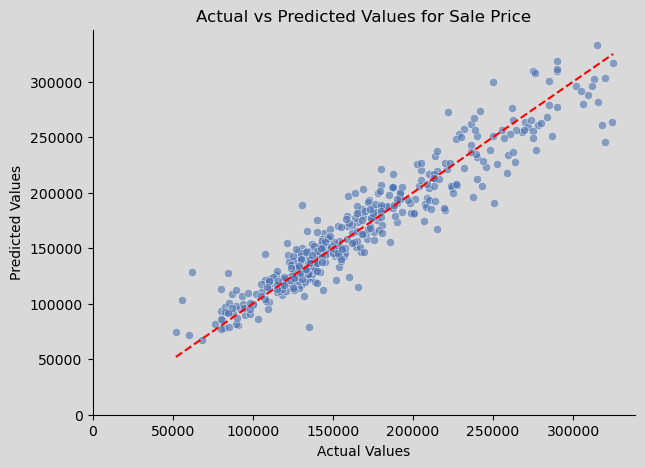


- Mean Squared Error: 0.01316004550453094
- Root Mean Squared Error: 0.11471724153121422


In [61]:
gbr_op = GradientBoostingRegressor(
    n_estimators = 1328,
    learning_rate = 0.0216886854957637,
    max_depth = 2,
    min_samples_split = 18,
    min_samples_leaf = 10,
    subsample = 0.5452943934828753,
    max_features = "sqrt"
)
gbr_op.fit(x_train_gbr, y_train)

yhat_gbr_op = gbr_op.predict(x_test_gbr)

PlotFitted(y_test, yhat_gbr_op, "Actual vs Predicted Values for Sale Price")

# **AUTHOR**

## Fábio Galdino